(final_template)=

# Oil and Opportunity: A Causal Analysis of Oil Production and Economic Growth

![](oil.png)

The overall structure of your final project should read like a technical blog post, where you motivate the importance of the topic to the readers, introduce the relevant background, give an instructional overview of your study design, and then present your analysis along with the code to generate the results.

You may format your final project however you like, but be sure to address the points outlined under each section. Feel free to add or modify subsections as needed, as well as delete the points and templated admonition sections, like the ones below. You can refer to the [template on the course website](https://comsc341cd.github.io/projects/final_template.html) as you work on your final project to make sure you're addressing all the points.

:::{tip}

For those who are interested in structuring academic writing, I suggest reading [Mensh and Kording 2017](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005619): Ten simple rules on structuring papers.

Note that this is completely optional, you are **not** required to adhere to these writing rules.

:::

:::{tip}
If the code to reproduce your results is long, you can use [Jupyter Book functionality for hiding/removing content](https://jupyterbook.org/en/stable/interactive/hiding.html) to toggle the visibility of the code cells.

:::




# Introduction

The economic impact of natural resources,especially oil,has long been debated among economists and policymakers. Oil can be a vital driver of national wealth, yet many oil-rich countries paradoxically experience sluggish economic progress. This contradiction is at the heart of what scholars call the "resource curse"—the idea that an abundance of natural resources might actually hinder a nation's long-term economic growth. Our study asks a simple yet powerful causal question: Does being an oil-producing country lead to higher per-capita GDP growth?

This question holds real-world significance. As the global economy continues to grapple with energy transitions, geopolitical shifts, and sustainability goals, understanding whether oil production is a blessing or a burden has never been more critical. If oil production indeed boosts economic performance, then supporting energy extraction in resource-rich nations might be justified. But if it hinders development, it may call for reforms in governance, investment strategy, and trade policy.

# Prior knowledge


Our research builds on a rich foundation of empirical and theoretical work in growth economics and development policy. Mankiw, Romer, and Weil (1992) laid the groundwork for understanding how human capital and investment influence economic growth. Their findings suggest that once we control for investment levels and education, poorer countries tend to grow faster, a concept known as convergence. This supports the inclusion of schooling, population growth, and investment as controls in our model when examining the impact of oil production.

Barro (1991) further underscores the importance of initial income levels, institutional quality, and education. These insights highlight that a country’s development trajectory depends on far more than its natural resources—institutions, policy choices, and human capital all matter. Therefore, our analysis includes these critical control variables to isolate the true causal effect of oil-producer status.

Sachs and Warner (1995) introduced the influential “resource curse” hypothesis. They find that natural resource abundance,especially in oil,can have a negative effect on economic growth, particularly when institutional quality is weak. This directly informs our project’s causal question and underscores the need for careful identification strategies, such as our regression discontinuity design.

Satti et al. (2020) offer a modern update by showing that oil abundance’s negative effects can be mitigated by trade openness. This implies that oil production doesn’t always doom a country’s economy. It depends on the broader policy environment. Their findings add nuance to our analysis, encouraging us to consider how other variables (like trade or governance) might interact with oil status.


# Causal question [1 pt]

Our study investigates the following causal question:
##### What is the average causal effect of being an oil-producing country on a nation's per-capita GDP growth between 1960 and 1985?

##### Treatment Variable:

Oil producer status (oil), a binary factor where 1 indicates that a country is classified as an oil producer and 0 otherwise.

##### Outcome Variable:
 
Average annual per-capita GDP growth from 1960 to 1985 (gdpgrowth), a numeric variable indicating the growth trajectory of a country’s economy over the 25-year period.


##### Causal Quantity of Interest

We aim to estimate the Average Treatment Effect on the Treated (ATT):

$$
\mathrm{ATT} \;=\; \mathbb{E}\bigl[Y(1) - Y(0)\,\bigm|\,D = 1\bigr].
$$

**Where:**

- **\(Y(1)\)** is the potential GDP growth if the country is an oil producer.  
- **\(Y(0)\)** is the potential GDP growth if the country is not an oil producer.  
- **\(D = 1\)** indicates the country is actually an oil producer.  


# Design

## Study strategy [1.5 pts]

Our study employs an observational design to estimate the causal effect of oil-producer status on a country's per-capita GDP growth from 1960 to 1985. Since oil status is not randomly assigned, our identification strategy relies on several critical assumptions to ensure valid causal inference.

##### 1. Unconfoundedness
This assumption states that, conditional on observed covariates, the treatment assignment (being an oil producer) is independent of the potential outcomes. In our study, we attempt to satisfy this by controlling for two key confounders:

Investment rate (invest) — since capital accumulation influences growth and may correlate with a country’s ability to exploit natural resources.

Schooling rate (school) — as a proxy for human capital, which directly affects economic performance and may differ systematically between oil and non-oil producers.

Population growth (popgrowth) - annual population growth rate, since demographic changes can influence economic output and may differ between oil and non‑oil producers

While these two variables are highly relevant and commonly used in economic growth models, they may not fully account for all sources of confounding. Other factors like institutional quality, political stability, trade policy, or geographic factors could also influence both oil status and GDP growth. Since we cannot control for unobserved variables, the unconfoundedness assumption remains strong and potentially violated, but we believe invest, popgrowth and school capture major observable economic drivers.

##### 2.  Consistency
Consistency requires that “being an oil producer” means the same thing for every country in our sample. We assume that a country has been classified as an oil producer if it reports positive oil rents (as a share of GDP) during 1960–1985. 

##### 3. Positivity
This assumption requires that for every combination of covariates (invest, school, popgrowth), there is a positive probability of being both treated and untreated. 
- Our 121 countries cover a wide range of invest, school and population growth values, so this should hold
- We’ll confirm by checking that propensity scores overlap if some invest, school and population growth values appear only in one group, our estimates there won’t be valid.

##### 4. SUTVA (Stable Unit Treatment Value Assumption)
This assumption requires that each country’s oil‑producer status is defined the same way for everyone and that one country’s treatment doesn’t influence another’s outcome.
- Assumes no interference between countries and a single, uniform treatment definition
- Global oil markets link producers through prices, trade, and geopolitics, creating spillovers
- Likely violated oil production in one nation can affect others
- We acknowledge this as a limitation of our study and recommend interpreting our estimates as local effects under the current global oil system


![](DAG1.jpg)

## Covariates [1 pt]

We use the GrowthDJ dataset compiled by Steven Durlauf and Paul Johnson (1995) for their cross‐country growth analysis. It contains 121 country‐level observations covering the period 1960–1985, drawing on sources such as the Penn World Table (for GDP and investment data) and World Bank publications (for literacy and enrollment rates). The sample includes a mix of OECD and non-OECD nations, resource-rich and resource-poor, selected for data completeness on income, human-capital, and natural-resource indicators.

In [97]:
raw_data = pd.read_csv("GrowthDJ.csv")
raw_data.head()

,rownames,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60
0,1,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0
1,2,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0
2,3,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0
3,4,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,NaN
4,5,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0


##### 1. GDP growth (Outcome) = Average growth rate of per capita GDP from 1960 to 1985 (in percent)
##### 2. Oil_producer (Treatment) = Is the country an oil-producing country? (Yes/No)

In our observational design, we worry that oil-producer status isn’t assigned at random—countries with oil may differ systematically in ways that also drive their growth. To block those back-door paths, we include the following covariates as potential confounders based on prior literature in the field:

##### 1. Physical investment rate - Average ratio of investment (including Government Investment) to GDP from 1960 to 1985 (in percent).
Countries that allocate a high share of GDP to investment are better able to fund expensive oil‐exploration and extraction projects, so higher investment correlates with oil-producer status. Similarly, higher investment directly fuels capital accumulation, a core driver of long-run per-capita growth in Solow-type models. Without controlling for investment, our oil coefficient would pick up part of that pure capital-formation effect.

##### 2. Education Level - Average fraction of working-age population enrolled in secondary school from 1960 to 1985 (in percent)
Societies with stronger educational systems and higher literacy are more likely to develop the managerial, technical, and institutional expertise needed to regulate and operate an oil sector. Human capital is a well-established growth engine—better-educated workforces innovate more, adopt technology faster, and sustain higher productivity.

##### 3. Population‐growth rate - Average growth rate of working-age population 1960 to 1985 (in percent)
Rapid population growth can expand labor pools and domestic markets, which may both incentivize governments to exploit natural resources and provide the workforce needed for extraction. Demographic dynamics shape per-capita growth via labor-force fluctuations and dependency ratios—higher working-age growth can mechanically boost measured per-capita output.

By conditioning on these covariates, each of which plausibly influences both a country’s likelihood of producing oil and its subsequent growth trajectory, we aim to satisfy the unconfoundedness assumption. That way, our estimated oil-producer coefficient more cleanly reflects the causal effect of oil status, rather than the influence of capital-formation choices, human-capital endowments or demographic trends.


##### Summary Statistics

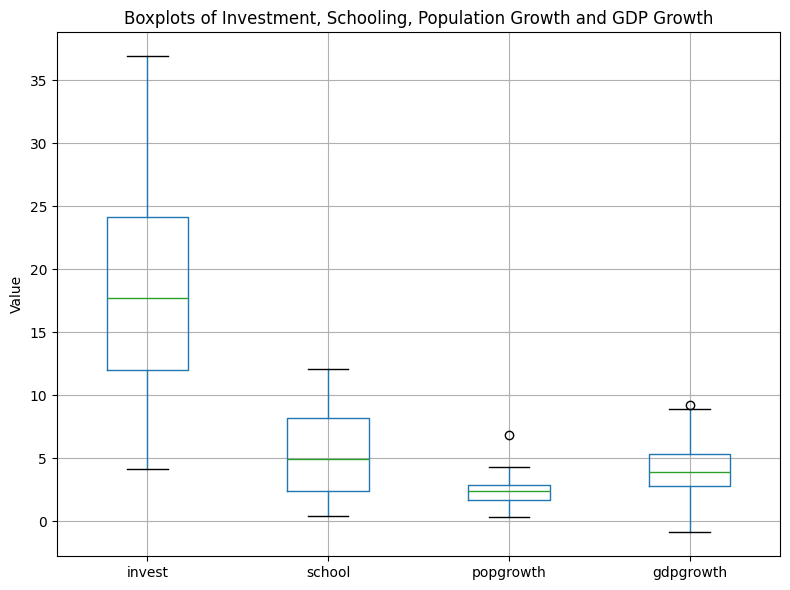

In [99]:
# Boxplots for 'invest', 'school', and 'popgrowth'
fig, ax = plt.subplots(figsize=(8, 6))
raw_data[['invest', 'school', 'popgrowth', 'gdpgrowth']].boxplot(ax=ax)
ax.set_title('Boxplots of Investment, Schooling, Population Growth and GDP Growth')
ax.set_ylabel('Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Investment: Median around 17 %, with the middle 50 % of countries investing between roughly 12 % and 24 % of GDP and total range spans about 4 % up to 37 %.

- School Enrollment: Median enrollment near 5%, IQR from about 3% to 8%, and an overall range of roughly 0.5 to 8.2%.

- Population Growth: Median annual growth of the working‐age population at 2.5 %, IQR between 1.8 % and 3%, and values ranging from about 0.6 % to 4.2%.

- GDP Growth: Median growth rate of per capita at 4%, IQR between 2.5% and 5.3%, and values ranging from about -0.01% to 9%. 

In [100]:
# Number of oil producers and non-producers
print(raw_data['oil'].value_counts())

oil
no     98
yes    23
Name: count, dtype: int64


# Estimation [2 pts]

- Provide at least one (but more if you'd like!) relevant figure visualization for your chosen study design. For example:
    - Randomized experiment: a distribution of covariates by treatment status to show balance
    - Observational study: a Love plot before and after matching or trimming
    - Instrumental variable: a bar plot showing the mean covariate values for compliers, never-takers, always-takers, and the overall population
    - Regression discontinuity: a point plot showing the "jump" in the treatment assignment at the cutoff
    - Difference-in-differences: a plot evaluating the parallel trends assumption pre-treatment
- Provide at least one mathematically typset equation for the **statistical quantity** you will be estimating.
- Describe your chosen estimator(s) for the causal quantity and how you will implement them.
- Report the results of your estimation, including the point estimate and 95% confidence intervals. 
- Include your unique deliverable here along with a discussion if you have chosen:
    - **Analysis extension**
    - **Simulation study**
    - **Additional methods exploration**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from IPython.display import display
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("GrowthDJ_updated.csv")
df.head()

In [ ]:
# Load data
df = pd.read_csv("GrowthDJ_updated.csv")

# Encode categorical columns 
df = pd.get_dummies(df, columns=['oil'], drop_first=True, dtype=int)

# Identify the complete case rows for training
train_df = df.dropna()
print(f"Training on {len(train_df)} complete cases")

# List the target columns to impute
targets = ['gdpgrowth', 'popgrowth', 'school']

# Train a regressor and predict missing values
for col in targets:
    # Find indices where this column is missing
    missing_idx = df[df[col].isnull()].index
    if len(missing_idx) == 0:
        continue

    # Build feature list
    features = [c for c in df.columns 
                if c != col and df[c].notnull().all()]

    # Prepare training data
    X_train = train_df[features]
    y_train = train_df[col]

    # Prepare data to predict
    X_pred = df.loc[missing_idx, features]

    # Train and predict
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    df.loc[missing_idx, col] = model.predict(X_pred)

    print(f"Imputed {len(missing_idx)} values in column '{col}'")

# Verify no missing remain in target columns
print(df[targets].isnull().sum())

# Save the imputed dataset
df.to_csv("GrowthDJ_regression_imputed.csv", index=False)
print("Saved imputed dataset as GrowthDJ_regression_imputed.csv")

In [ ]:
df_cleaned = pd.read_csv("GrowthDJ_regression_imputed.csv")
# Rename the coulmn oil_yes to oil 
df_cleaned.rename(columns={'oil_yes': 'oil'}, inplace=True)
df_cleaned.head(20)

In [101]:
# The covariates for propensity score estimation
covariates = ['invest', 'school', 'popgrowth']
X = df_cleaned[covariates]
X = sm.add_constant(X)  
y = df_cleaned['oil']

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit(disp=False)

# Predict and store the propensity scores
df_cleaned['propensity_score'] = logit_model.predict(X)

df_cleaned[['oil', 'invest', 'school','popgrowth','propensity_score']].head()

,oil,invest,school,popgrowth,propensity_score
0,0,24.1,4.5,2.6,0.293643
1,0,5.8,1.8,2.1,0.043812
2,0,10.8,1.8,2.4,0.089938
3,0,28.3,2.9,3.2,0.530416
4,0,12.7,0.4,0.9,0.025929


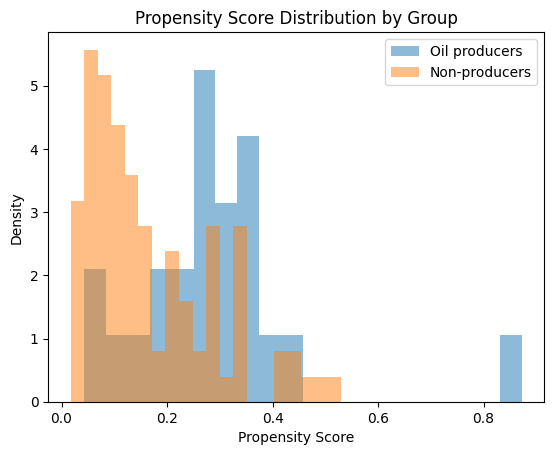

In [102]:
# Split by treatment
ps_treated = df_cleaned.loc[df_cleaned['oil'] == 1, 'propensity_score']
ps_control = df_cleaned.loc[df_cleaned['oil'] == 0, 'propensity_score']

plt.figure()
plt.hist(ps_treated, bins=20, density=True, alpha=0.5, label='Oil producers')
plt.hist(ps_control, bins=20, density=True, alpha=0.5, label='Non-producers')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Distribution by Group')
plt.legend()
plt.show()

In [103]:
# Splitting treated & control
treated = df_cleaned[df_cleaned['oil'] == 1]
control = df_cleaned[df_cleaned['oil'] == 0]

# Fitting KNN on control's propensity scores
nn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree')
nn.fit(control[['propensity_score']])

# Finding its single closest control
distances, indices = nn.kneighbors(treated[['propensity_score']])

# Extracting those matched controls
matched_controls = control.iloc[indices.flatten()].copy()
matched_df = pd.concat([treated, matched_controls])
matched_df.head()

,gdpgrowth,popgrowth,invest,school,oil,propensity_score
12,7.0,1.400,22.1,2.600,1,0.094981
13,3.6,3.134,18.1,1.500,1,0.289940
15,2.2,1.600,10.9,1.688,1,0.043007
18,6.8,1.900,12.6,2.000,1,0.066301
35,7.2,2.813,17.7,3.700,1,0.220497


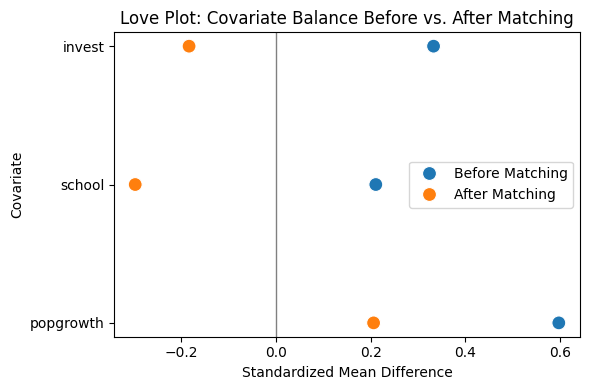

In [110]:
# Computing standardized differences before and after matching
covariates = ['invest', 'school', 'popgrowth']
std_before, std_after = [], []

for cov in covariates:
    # Before matching
    t0 = df_cleaned[df_cleaned['oil'] == 1][cov]
    c0 = df_cleaned[df_cleaned['oil'] == 0][cov]
    sd0 = (t0.mean() - c0.mean()) / np.sqrt((t0.var() + c0.var()) / 2)
    std_before.append(sd0)
    # After matching
    t1 = matched_df[matched_df['oil'] == 1][cov]
    c1 = matched_df[matched_df['oil'] == 0][cov]
    sd1 = (t1.mean() - c1.mean()) / np.sqrt((t1.var() + c1.var()) / 2)
    std_after.append(sd1)

# Building data for plotting
std_df = pd.DataFrame({'covariate': covariates,'Before Matching': std_before,'After Matching': std_after})

# Love Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=std_melt, x='StdDiff', y='covariate', hue='Dataset', s=100)
plt.axvline(0, color='grey', linewidth=1)
plt.title('Love Plot: Covariate Balance Before vs. After Matching')
plt.xlabel('Standardized Mean Difference')
plt.ylabel('Covariate')
plt.legend(title='')
plt.tight_layout()
plt.show()

In [106]:
# Fitting a linear regression on the matched dataset
model = smf.ols(
    formula="gdpgrowth ~ oil + invest + school + popgrowth",
    data=df_cleaned).fit()

# 95% confidence intervals
ci = model.conf_int(alpha=0.05)
ci.columns = ['lower 95%', 'upper 95%']

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              gdpgrowth   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     9.893
Date:                Sat, 10 May 2025   Prob (F-statistic):           6.37e-07
Time:                        15:17:49   Log-Likelihood:                -229.24
No. Observations:                 121   AIC:                             468.5
Df Residuals:                     116   BIC:                             482.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3563      0.640      0.557      0.5

# Interpretation [2 pts]

Our ATT estimate for oil‐producer status is a coefficient of –0.048 ( p = 0.905). Once we hold investment share, schooling rates, and population growth constant, oil‐producing countries in our 1960–85 sample grew 0.05 percentage points per year slower than non-producers but this difference is essentially zero from a statistical standpoint(p=0.905<0.05). We are 95% confident that the true effect of being an oil producer on annual per-capita GDP growth lies somewhere between - 0.85 percentage points and 0.75 percentage points.

Resource-curse theory (Sachs & Warner) predicts that oil abundance tends to harm growth, sometimes by one or two percentage points per annum in mid-20th-century cross-country panels. Our point estimate is negative—in line with the curse hypothesis—but it’s an order of magnitude smaller and far from significant, so it neither strongly confirms nor refutes the traditional finding. Instead, our result is inconclusive: there’s no detectable oil effect once we control for the key drivers Barro (1991) and MRW (1992) tell us matter. A 0.05 percentage points annual difference cumulates to only about 1.25 percentage points over 25 years which is trivial compared to typical cross-country growth variation. Our highly significant coefficients on investment (+0.12 pp per 1 % GDP invested) and population‐growth (+0.73 pp per 1 %) reinforce that physical capital accumulation and human capital are far more powerful growth engines than any residual oil effect in this sample.

Because we fit a linear regression on our full 121-country sample, the coefficient on oil estimates the Average Treatment Effect (ATE) across these nations, under the usual linearity and unconfoundedness assumptions. Our dataset spans a mix of OECD and non-OECD, resource-rich and resource-poor countries but only those with reliable mid-century data on GDP, investment, schooling, and oil rents. Therefore, our conclusions apply to only that particular historical cross-section of nations so they should not be over-generalized to today’s post-2000 economies, nor to individual cases. For example, our framework can’t tell us with complete certainty how Nepal’s GDP growth would change if Nepal were an oil producer. Our analysis lacks the temporal variation needed to claim that our findings hold outside that narrow window.


## Limitations of Our Study Design & Analysis

##### Cross‐Sectional Data Only
We analyze a single 25-year snapshot (1960–1985) for each country rather than year-by-year panel data. Without within‐country time variation, we cannot control for unobserved, time-invariant factors (e.g. geography, culture, long-run institutions) that might confound the oil–growth relationship. As a result, our estimates may omit important country-specific drivers of growth.

##### Unobserved Confounding
Even after adjusting for investment, schooling, and population growth, we cannot rule out bias from omitted variables such as political stability, legal institutions, trade policy, or geographic factors. If these unmeasured confounders correlate with both oil-producer status and growth, our ATT estimates will be biased.

##### SUTVA Violations
Global oil markets link countries through prices and trade. One country’s production can affect world prices and thus other countries’ growth. Our design assumes no such spillovers—an idealization that, if violated, means our estimates capture both the direct and indirect effects of oil production.

##### Treatment Definition
We use a binary oil-producer flag based on historical oil-rent shares. This classification doesn't capture the range of production scale, revenue volatility, or oil‐type differences across countries. A continuous measure (e.g. oil rents as % of GDP) might capture more nuanced effects.

## Future Deliverables
We propose to leverage our current GrowthDJ dataset, where oil‐producer status is our treatment and 1960–85 per‐capita GDP growth our outcome by adding a running variable: each country’s geodesic distance to the nearest proven oil‐deposit boundary. Instead of relying on global regression and
propensity‐score matching which assume no unmeasured confounders across all countries, our RDD compares countries just inside versus just outside the deposit zone, creating a local “as-if” randomization. We use the existing covariates (investment, schooling, population growth, initial GDP, literacy, OECD membership, and data-quality flags) as balance checks at the cutoff to verify that nothing else jumps at zero distance. We then fit separate local-linear regressions on each side to estimate the discontinuity in GDP growth. This yields a LATE of oil status and transforms our causal question, “What is the effect of oil-producer status on GDP growth?”, from an assumption-heavy observational estimate into a testable quasi-experiment directly grounded in our data.

# What to submit [1 pt]

- A `final_project.zip` file containing your typeset Jupyter Book html article, following the same build process as described in [Project 3](https://comsc341cd.github.io/projects/proj3_analysis.html#typesetting-and-submission)

- All source code `.ipynb` or `.py` files used for data cleaning/preprocessing to reproduce your results

:::{tip}

The published html article should still have source code cells. However, you may want to do data cleaning/preprocessing if needed in a separate file so that the focus in your rendered article is on the analysis and results.

:::